In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential, model_from_json
from keras.layers import Dense
from keras.optimizers import RMSprop
import pylab as plt

Using TensorFlow backend.


In [3]:
batch_size = 128
num_classes = 10
epochs = 2

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train sample')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 5s 0us/step
60000 train sample
10000 test samples


Label: [[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]]


<function matplotlib.pyplot.show(*args, **kw)>

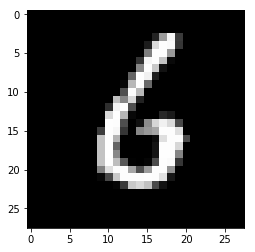

In [5]:
print("Label:",y_test[50:51])
plt.imshow(x_test[50:51].reshape(28,28), cmap='gray')
plt.show

In [6]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


Shape of First Layer (784, 32)
Visualization of First Layer


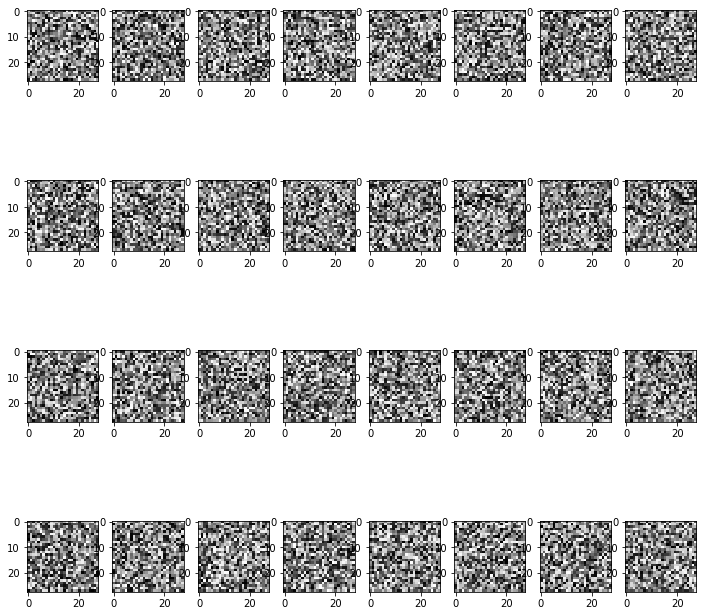

In [9]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)
layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig = plt.figure(figsize=(12,12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [10]:
model.compile(loss = 'categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy'])

In [13]:
history = model.fit(x_train, y_train, batch_size=batch_size,
                   epochs=epochs,
                   verbose=1)

Epoch 1/2
60000/60000 [==============================] - 2s 41us/step - loss: 0.2443 - accuracy: 0.9336
Epoch 2/2
60000/60000 [==============================] - 3s 44us/step - loss: 0.2116 - accuracy: 0.9415


In [14]:
score = model.evaluate(x_test, y_test, verbose=0)
print('test loss:', score[0])
print('test accuracy:', score[1])

test loss: 0.2054617037385702
test accuracy: 0.9422000050544739


Shape of First Layer (784, 32)
Visualization of First Layer


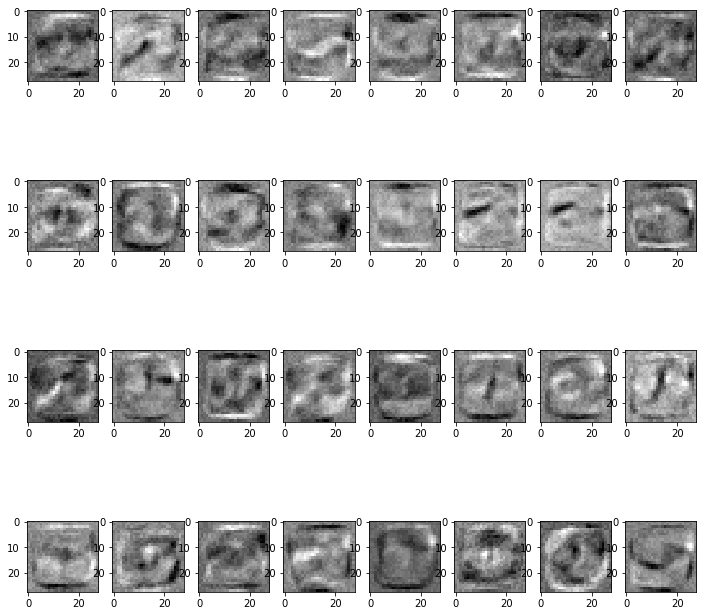

In [15]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)
layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig = plt.figure(figsize=(12,12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [19]:
prediction = model.predict(x_test[600:601])
prediction = prediction[0]
print('prediction', prediction)
print('threshholed output', (prediction>0.5)*1)

prediction [5.7911547e-04 3.6346549e-04 1.0003680e-03 3.8310040e-07 2.4483786e-03
 2.3022840e-04 9.9532688e-01 1.0433556e-05 3.8266335e-05 2.3947841e-06]
threshholed output [0 0 0 0 0 0 1 0 0 0]


In [20]:
sum(prediction)

0.9999999104005326

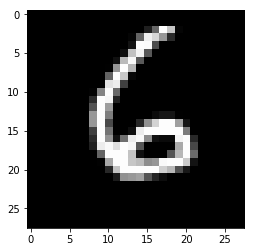

In [21]:
plt.imshow(x_test[600:601].reshape(28,28), cmap='gray')
plt.show()

In [26]:
!pip install opencv-python

     |████████████████████████████████| 28.2MB 33kB/s  eta 0:00:01    |██████▎                         | 5.5MB 2.0MB/s eta 0:00:12     |███████████████████████▏        | 20.4MB 7.0MB/s eta 0:00:02     |███████████████████████████▌    | 24.2MB 7.0MB/s eta 0:00:01
You should consider upgrading via the 'pip install --upgrade pip' command.


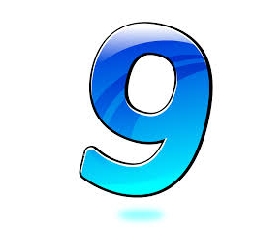

In [45]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

image_bgr = cv2.imread('nine.jpg', cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb), plt.axis("off")
plt.show()

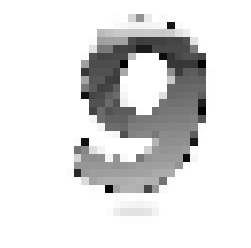

In [46]:
image = cv2.imread('nine.jpg', cv2.IMREAD_GRAYSCALE)
image_resized = cv2.resize(image, (28, 28))

plt.imshow(image_resized, cmap='gray'), plt.axis("off")
plt.show()

In [47]:
prediction = model.predict(image_resized.reshape(1,784))
print('prediction score: \n', prediction[0])
thresholded = (prediction>0.5)*1
print('\nthresholed score: \n', thresholded[0])
print('\nPredicted Digit: ', np.where(thresholded == 1)[1][0])

prediction score: 
 [2.7779792e-05 1.5593584e-04 7.2307244e-02 9.1554111e-01 1.4071173e-05
 1.7540891e-03 1.3149922e-06 6.1174906e-03 1.4068048e-03 2.6740725e-03]

thresholed score: 
 [0 0 0 1 0 0 0 0 0 0]

Predicted Digit:  3


In [53]:
model_json = model.to_json()
with open ("model.json", "w") as json_file:
    json_file.write(model_json)
    
model.save_weights("model.h5")
print("Model Saved")

Model Saved
